# **Exploratory Data Analysis of Medical Appointment System Dataset**

In [5]:
# Import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta, date, time

In [6]:
!wget -q https://raw.githubusercontent.com/carogaltier/EDA-Medical-appointment-system/refs/heads/main/plot_functions.py

from plot_functions import *

In [7]:
# Import dataframes
slots_url = "./data/slots.csv"
patients_url = "./data/patients.csv"
appointments_url = "./data/appointments.csv"
try:
    slots_df = pd.read_csv(slots_url)
    patients_df = pd.read_csv(patients_url)
    appointments_df = pd.read_csv(appointments_url)

    print("Dataframes loaded successfully.")
except Exception as e:
    print(f"Error loading the dataframes: {e}")

Dataframes loaded successfully.


## **1. Slots Table**

### *Table Structure*
- **slot_id** *(Integer)*: _Unique identifier for each time slot._

- **appointment_date** *(Date)*: _Date of the appointment._

- **appointment_time** *(Time)*: _Scheduled time of the appointment (15-minute intervals)._

- **is_available** *(Boolean)*: _Indicates if the slot is available (True) or not (False)._

In [8]:
slots_df.head()

,slot_id,appointment_date,appointment_time,is_available
0,1,2015-01-01,08:00:00,False
1,2,2015-01-01,08:15:00,False
2,3,2015-01-01,08:30:00,False
3,4,2015-01-01,08:45:00,False
4,5,2015-01-01,09:00:00,False


## Slot Scheduling Summary

- **Total Operating Days:** _The total number of calendar days from the first to the last date in the dataset._
  
- **Total Working Days:** _The total number of unique days with slots._
  
- **Slots Per Day:** _The number of slots per day._
  
- **Slots Per Week:** _The number of slots in a 7-day period._
  
- **Total Slots:** _The total number of slots in the dataset._

- **Fill Rate Before Reference Date:** _The percentage of non-available slots before the reference date (2024-12-01)._

In [9]:
metrics = calculate_slot_metrics(slots_df)
for key, value in metrics.items():
    print(f"{key}: {value}")

Total Operating Days: 3653
Total Working Days: 2609
Slots Per Day: 40
Slots Per Week: 280
Total Slots: 104360
Fill Rate Before Reference Date: 90.0


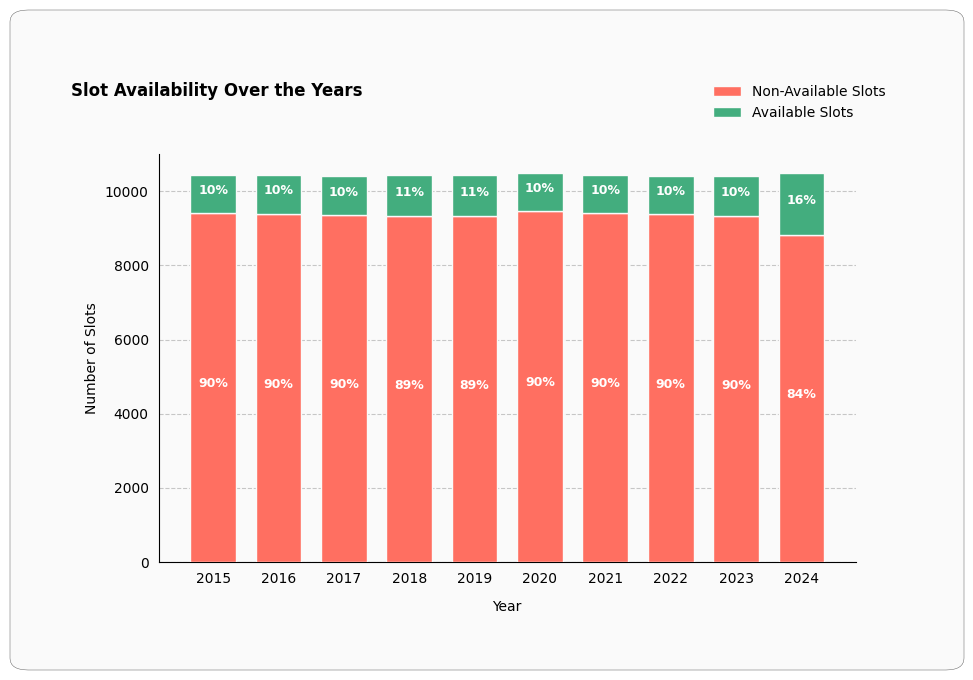

In [10]:
plot_slots_availability(slots_df)

## **2. Patients Table**

### *Table Structure*
- **patient_id** *(Integer)*: Unique identifier for each patient.

- **name** *(String, up to 60 characters)*: Full name of the patient.

- **sex** *(String)*: Gender of the patient ('Male', 'Female', 'Non-binary').

- **dob** *(Date)*: Date of birth in YYYY-MM-DD format.

- **insurance** *(String, up to 30 characters)*: Name of the patient's insurance provider from a predefined list of fictitious names.


In [11]:
patients_df.head()

,patient_id,name,sex,dob,insurance
0,1,Allison Hill,Female,1946-12-30,Mediflora Nexus
1,2,Nancy Rhodes,Female,1969-02-21,BioCrest Harmony
2,3,Angie Henderson,Female,1952-01-09,BioCrest Harmony
3,4,Colleen Wagner,Female,1981-01-28,BioCrest Harmony
4,5,Christina Santos,Female,1989-05-19,CurativeWhale


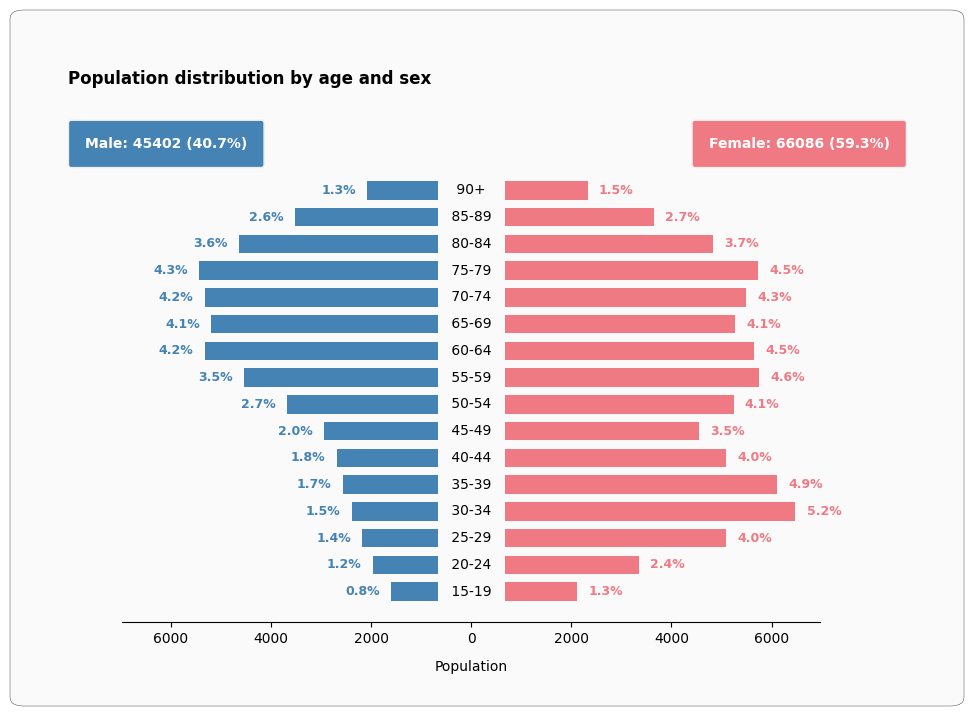

In [12]:
plot_population_pyramid(appointments_df)

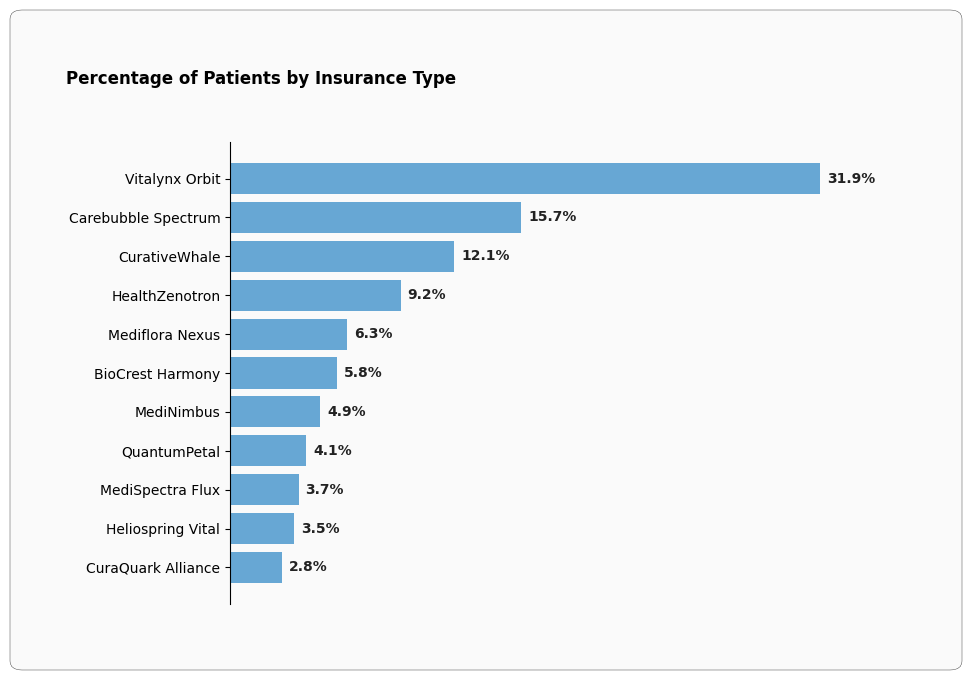

In [13]:
plot_insurance_distribution(patients_df)

## **3. Appointments Table**

This file provides detailed records of individual appointments, including scheduling details, appointment statuses, and patient interactions. Key fields include appointment IDs, scheduling and appointment dates, statuses (e.g., attended, cancelled, no-show), and related patient information. It is crucial for studying appointment outcomes and system performance.

### *Table Structure*
- **appointment_id** *(Integer)*: Unique identifier for each appointment.

- **slot_id** *(Integer)*: References the slot in the Slots table.

- **scheduling_date** *(Date)*: Date when the appointment was scheduled.

- **appointment_date** *(Date)*: Date of the appointment.

- **appointment_time** *(Time)*: Scheduled time of the appointment.

- **scheduling_interval** *(Integer)*: Days between scheduling date and appointment date.

- **status** *(String)*: Appointment status ('available', 'scheduled', 'completed', 'cancelled', 'no-show').

- **check_in_time** *(Time)*: Actual time the patient checked in.

- **appointment_duration** *(Float)*: Duration of the appointment in minutes.

- **start_time** *(Time)*: Actual start time of the appointment.

- **end_time** *(Time)*: Actual end time of the appointment.

- **waiting_time** *(Float)*: Waiting time in minutes.

- **patient_id** *(Integer)*: References the patient in the Patients table.

- **sex** *(String)*: Gender of the patient.

- **age** *(Integer)*: Age of the patient.

- **age_group** *(String)*: Age group category of the patient.

In [14]:
appointments_df.head()

,appointment_id,slot_id,scheduling_date,appointment_date,appointment_time,scheduling_interval,status,check_in_time,appointment_duration,start_time,end_time,waiting_time,patient_id,sex,age,age_group
0,138,1,2014-12-28,2015-01-01,08:00:00,4,did not attend,NaN,NaN,NaN,NaN,NaN,8285,Male,37,35-39
1,146,23,2014-12-29,2015-01-01,13:30:00,3,did not attend,NaN,NaN,NaN,NaN,NaN,5972,Male,84,80-84
2,21,24,2014-12-17,2015-01-01,13:45:00,15,attended,13:36:45,5.2,13:37:57,13:43:09,1.2,6472,Male,77,75-79
3,233,25,2014-12-31,2015-01-01,14:00:00,1,attended,13:59:32,28.9,14:00:40,14:29:34,1.1,5376,Female,37,35-39
4,90,26,2014-12-26,2015-01-01,14:15:00,6,cancelled,NaN,NaN,NaN,NaN,NaN,8028,Male,72,70-74


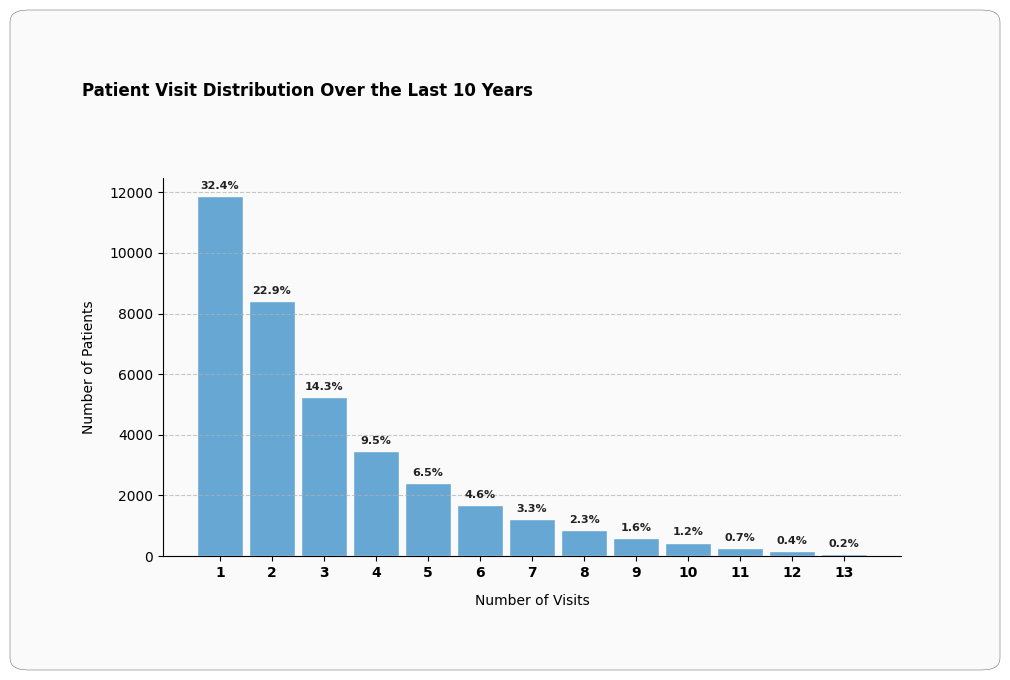

In [15]:
plot_patients_visits(appointments_df)

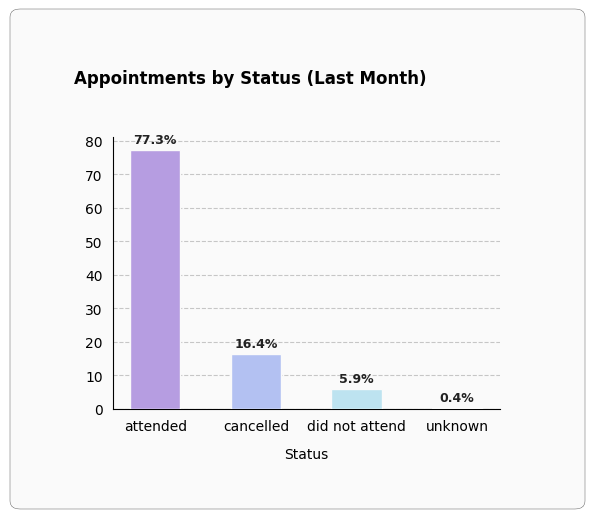

In [16]:
plot_appointments_by_status(appointments_df)

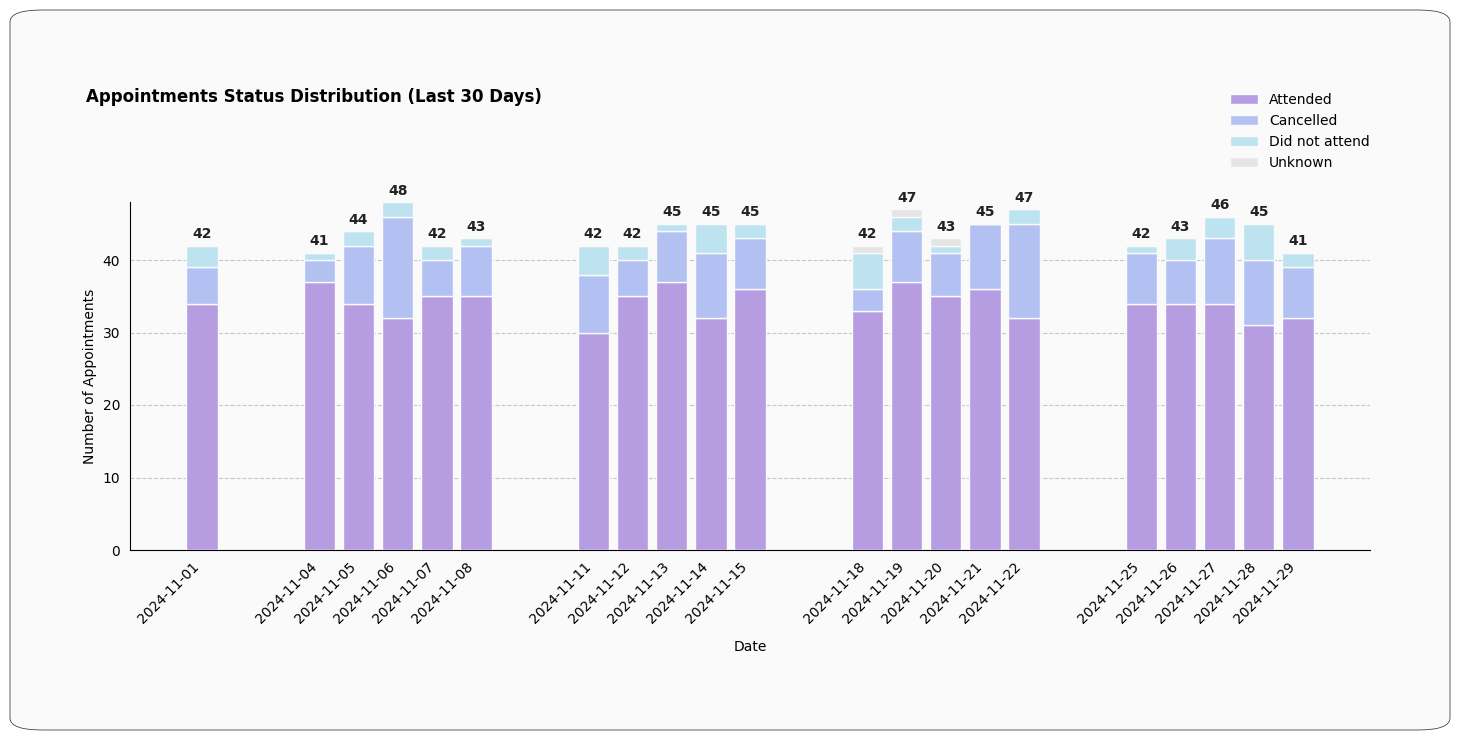

In [17]:
plot_status_distribution_last_30_days(appointments_df)

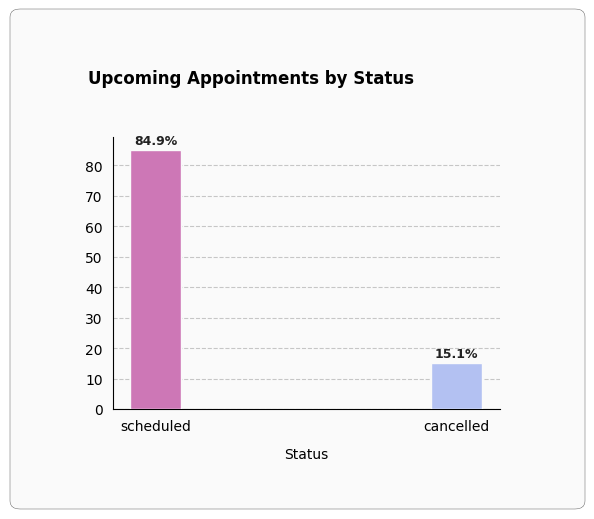

In [18]:
plot_appointments_by_status_future(appointments_df)

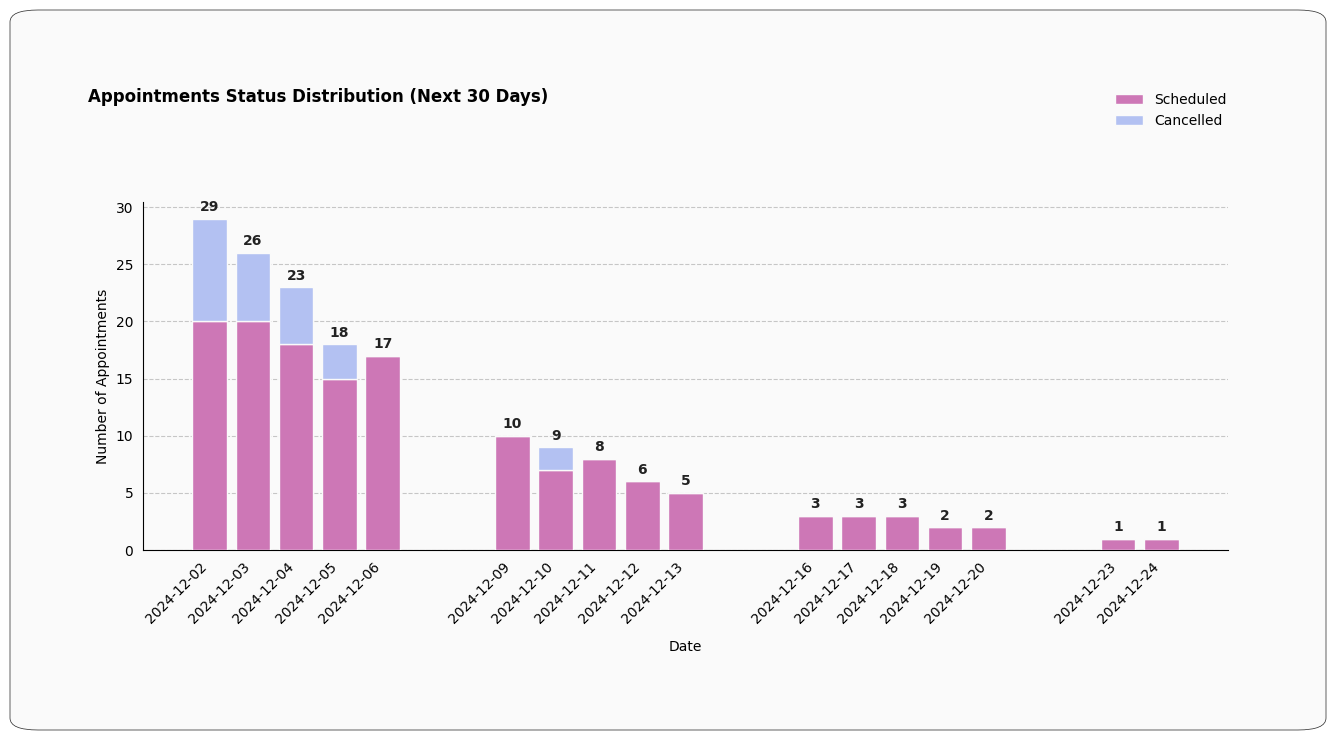

In [19]:
plot_status_distribution_next_30_days(appointments_df)

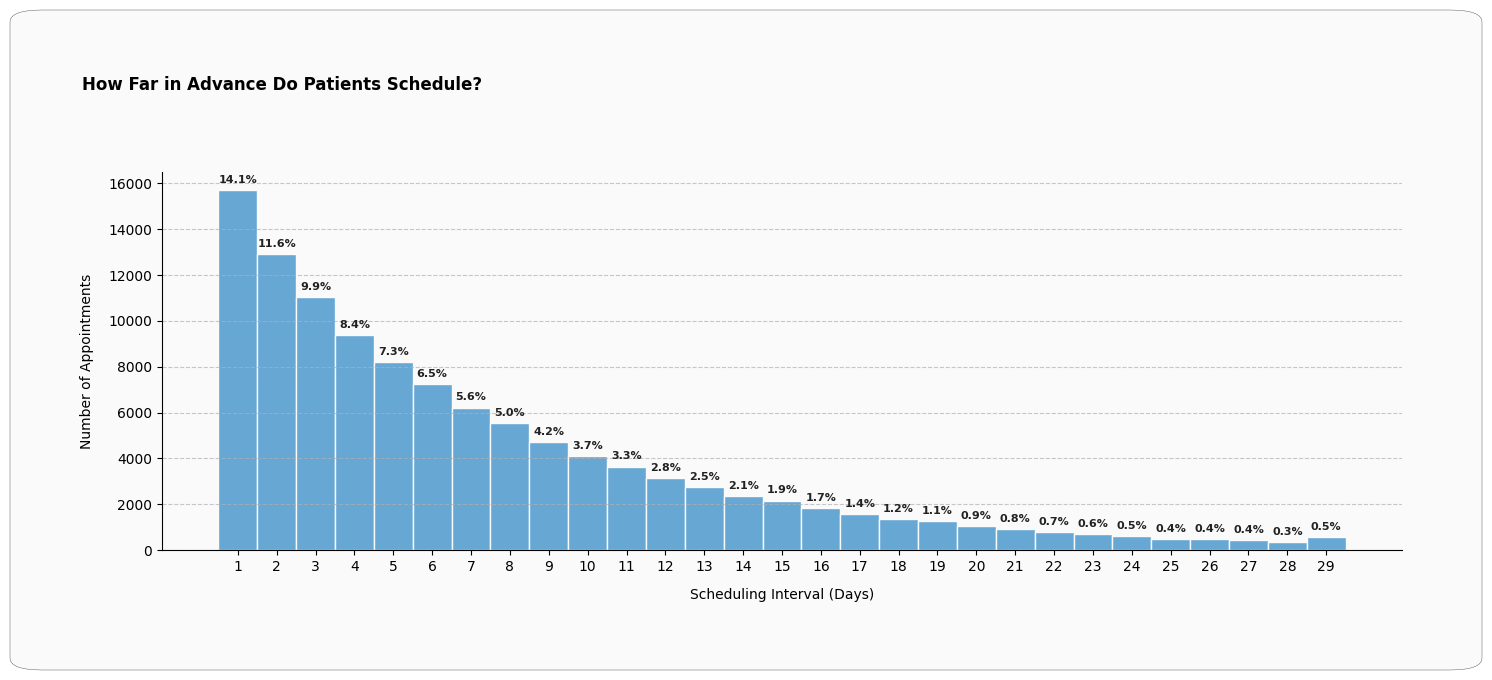

In [20]:
plot_scheduling_interval_distribution(appointments_df)

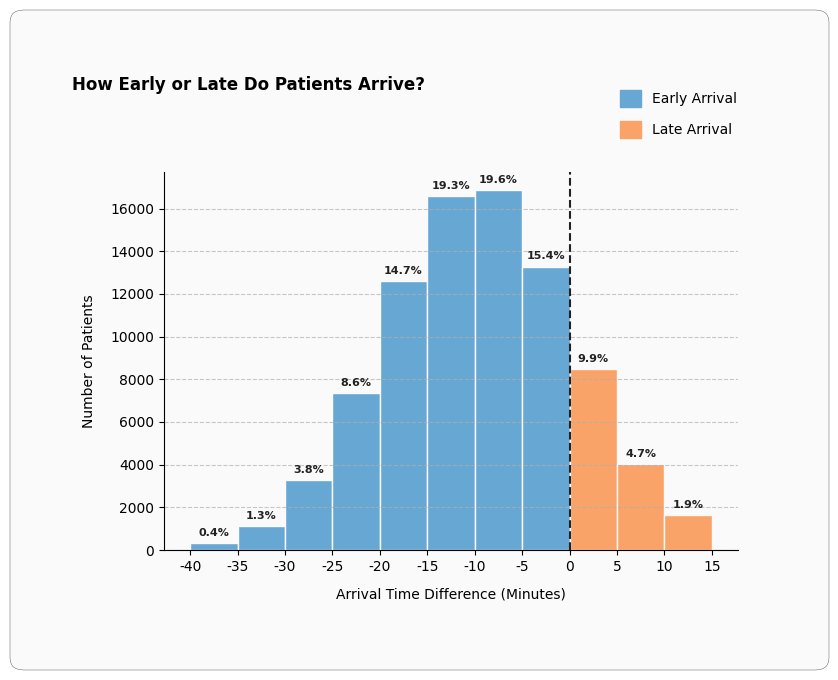

In [21]:
plot_arrival_time_distribution(appointments_df)

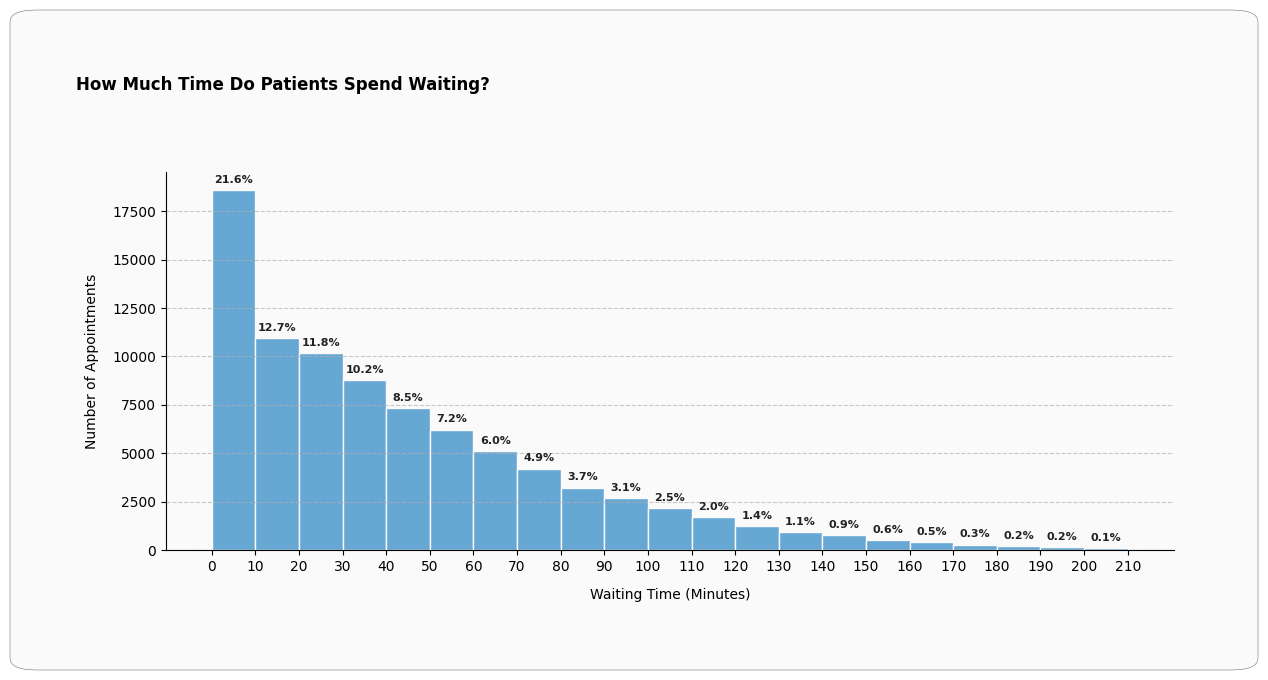

In [22]:
plot_waiting_time_distribution(appointments_df)

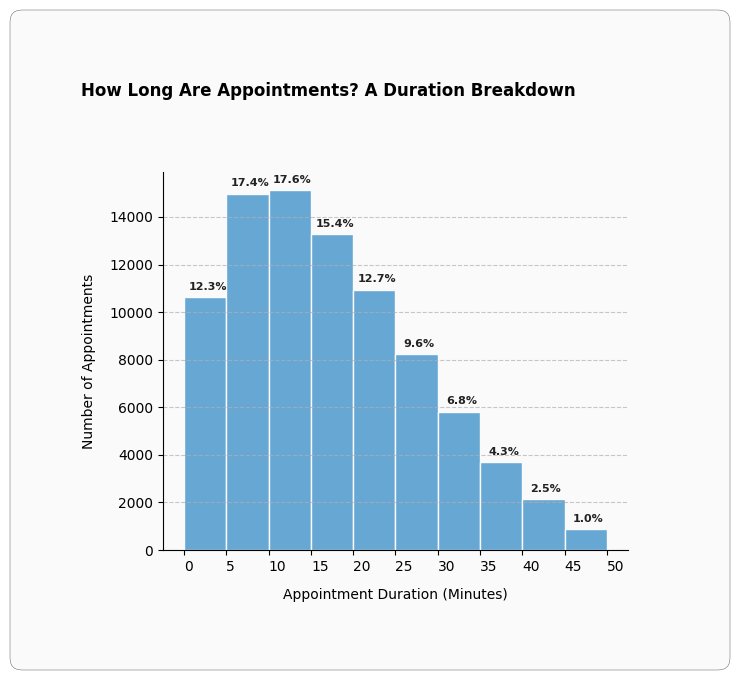

In [23]:
plot_appointment_duration_distribution(appointments_df)